In [1]:
# to solve schrodinger's equation in 1d
# [-h_bar^2/(2m) * d^2/dx^2 +V(x)](psi) = E*psi(x) -> Hamiltonian operator(wave function) = Energy * wave function

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
print('tensorflow version = %s'%(tf.__version__))
print('Ready...')

C:\Users\JeongYeong\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


tensorflow version = 1.9.0
Ready...


# infinite wall problem

In [2]:
# define potential function, inf == 1000.0
# axis x = [0, 1]
bins = 100; dx = 1 / bins;
inf = 1000

pot = np.zeros(bins)
pot[0] = inf; pot[-1] = inf
pot = tf.constant(pot, shape=pot.shape, dtype=tf.float32, name='infinite_potential_wall')

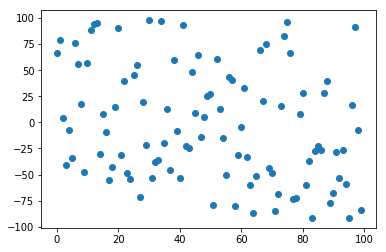

In [16]:
# make train_x and placeholder for training
# make training dataset and looking its character
init_x = np.arange(bins).reshape([1, bins])
init = np.random.uniform(low=-100, high=100, size=[1, bins])
plt.scatter(init_x, init)
plt.show()
# make placeholder
train = tf.placeholder(tf.float32, [1, bins], name='training_psi')

In [17]:
a = ['a','b','c']


'a'

In [7]:
# define weight and bias - n layers, using batch normalization
def make_layers(n):
    



weight1 = tf.Variable(tf.random_normal([bins, bins]), name='weight1')
bias1 = tf.Variable(tf.random_normal([1, bins]), name='bias1')

In [8]:
# define model and cost function -> Energy
psi = tf.add(tf.matmul(train, weight1), bias1)
prob = tf.reduce_sum(tf.square(psi), name='all_prob')
psi = tf.divide(psi, tf.sqrt(prob), name='psi')

# [-h_bar^2/(2m) * d^2/dx^2 +V(x)](psi) = E*psi(x)
# d^f/dx^2 = (2f(x) - f(x+h) - f(x-h)) / h^2
# h_bar = 6.63 * 10^(-34)
h_bar = 6.63 * 10**(-34)
m = 9.11 * 10**(-31)
C = tf.constant(-h_bar**2 / (2 * m), shape=[1, 1], name='constant')
#C = tf.constant(1., shape=[1,1], name='constant')
d2V = tf.subtract(2 * pot, tf.add(tf.concat([[inf], pot[1:]], 0), tf.concat([pot[:-1], [inf]], 0)))
H = tf.add(tf.multiply(C, psi), tf.multiply(d2V, dx**2), name='hamiltonian')
energy = tf.reduce_mean(tf.divide(H, psi, name='E'))

In [9]:
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(energy)

In [10]:
sum_energy = tf.summary.scalar('energy', energy)
sum_psi = tf.summary.scalar('prob', tf.reduce_sum(tf.square(psi)))

In [11]:
directory = './schrodinger_eq_1d'
with tf.Session() as sess:
    writer = tf.summary.FileWriter(directory)
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    itr = 10000;
    
    for step in tqdm_notebook(range(itr)):
        randinput = np.random.normal(loc=0.5, scale=10, size=[1, bins])
        _, cost_val = sess.run([opt, energy], feed_dict={train: randinput})
        
        sum1, sum2 = sess.run([sum_energy, sum_psi], feed_dict={train: randinput})
        writer.add_summary(sum1, global_step=step)
        writer.add_summary(sum2, global_step=step)
    
    w_val1 = sess.run(weight1)
    b_val1 = sess.run(bias1)
    potential = sess.run(pot)
    

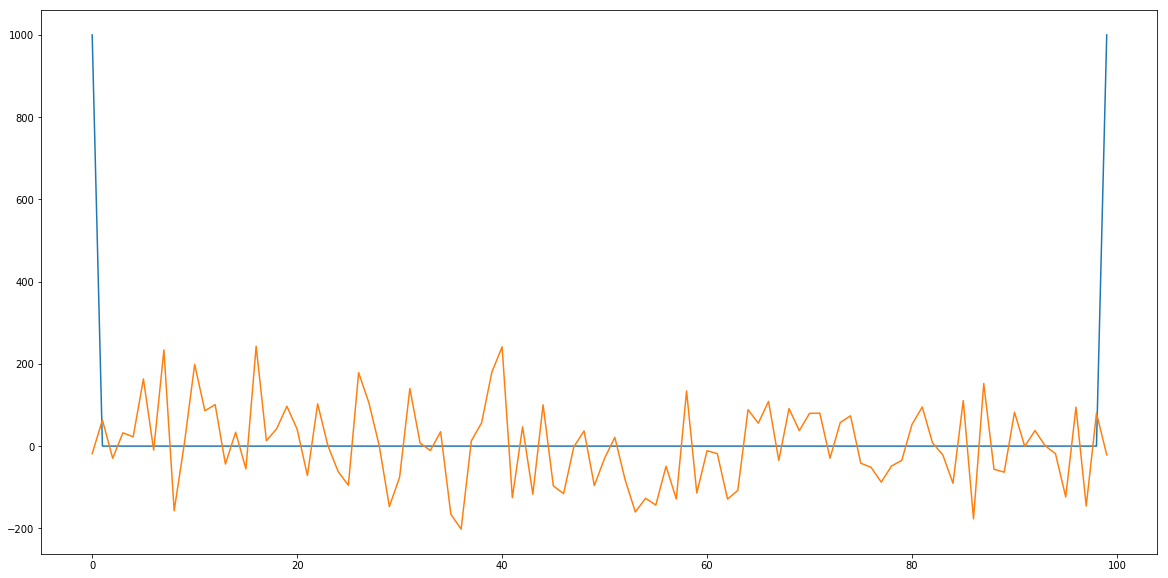

In [12]:
plt.figure(figsize=(20, 10))

x = np.arange(bins)
plt.plot(x, potential)
y = np.random.normal(loc=0.5, scale=10, size=[1, bins])
psi = np.dot(y, w_val1) + b_val1
psi = psi.reshape(x.shape)
plt.plot(x, psi)
#plt.ylim(-200, 200)
plt.show()

In [93]:
print(cost_val)

-3.0398292e-38


In [47]:
psi.reshape(20).shape

(20,)

In [4]:
import numpy as np
np.true_divide(0.0/0.00)
print(0.0/0.0)

ZeroDivisionError: float division by zero